<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/AIQUANT001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
x, y = make_blobs(n_samples=100, centers=4,
                  random_state=500, cluster_std=1.25)

In [4]:
model = KMeans(n_clusters=4, random_state=0, n_init='auto')

In [5]:
model.fit(x)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [6]:
y_ = model.predict(x)

In [7]:
y_

array([0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 3, 3, 0, 1, 3, 1, 3, 3, 0,
       2, 1, 2, 2, 3, 3, 2, 0, 1, 2, 2, 3, 2, 0, 2, 0, 1, 1, 1, 2, 3, 3,
       0, 2, 1, 3, 1, 3, 0, 3, 2, 3, 2, 0, 2, 1, 3, 0, 2, 3, 0, 1, 0, 3,
       2, 2, 2, 1, 0, 2, 1, 3, 1, 0, 1, 3, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1,
       3, 3, 3, 0, 0, 0, 0, 3, 0, 2, 3, 3], dtype=int32)

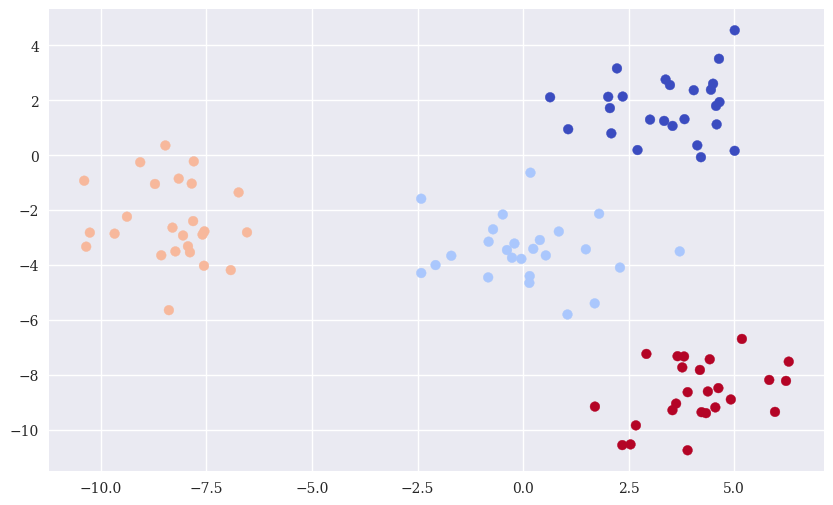

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_,  cmap='coolwarm');

#Reinforcement Learning

In [9]:
ssp = [1, 1, 1, 1, 0]

In [10]:
asp = [1, 0]

In [11]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
    return tr

In [12]:
rl = np.array([epoch() for _ in range(15)])
rl

array([52, 48, 44, 52, 45, 51, 53, 55, 48, 51, 45, 50, 60, 45, 53])

In [13]:
rl.mean()

50.13333333333333

In [14]:
ssp = [1, 1, 1, 1, 0]

这段代码的作用是模拟100次试验，每次试验都是从两个列表中随机抽取一个元素，然后看这两个元素是否相同。同时，每一次试验结束后，将从 ssp 中抽取的元素追加到 asp 列表中，可能改变后续抽取的概率分布。最后返回在100次试验中满足条件的次数。

随着迭代次数的增多，asp和ssp之间0-1概率分布会趋于相同。
相等的概率为：0.8x0.8+0.2x0.2=0.64+0.04=0.68。

In [15]:
def epoch():
    tr = 0
    asp = [0, 1]
    for _ in range(100):
        #整数集合中随机抽取元素
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        asp.append(s)
    return tr

In [16]:
rl = np.array([epoch() for _ in range(15)])
rl

array([63, 60, 62, 64, 67, 51, 62, 56, 76, 64, 66, 64, 58, 59, 74])

In [17]:
rl.mean()

63.06666666666667

In [18]:
if rl.mean() is not None:
  print('OK')

OK


#Supervised Learning

##OLS Regression

OLS回归（Ordinary Least Squares Regression）是一种常见的线性回归方法，用于数据分析和统计建模。OLS回归的目的是找到最能够描述自变量（解释变量）和因变量（响应变量）之间关系的线性模型。

在OLS回归中，我们假设因变量Y和一系列自变量X1, X2, ..., Xn之间存在如下的线性关系：

Y = β0 + β1X1 + β2X2 + ... + βnXn + ε

其中，β0是截距项，β1到βn是模型参数（斜率），它们表示自变量与因变量之间的关系强度，而ε是误差项，代表了除了自变量以外的其他因素对因变量的影响。

OLS回归旨在通过最小化误差项的平方和来估计模型的参数（β0, β1, ..., βn）。也就是说，它试图找到一组参数，使得所有观测值的实际值和模型预测值之间的差异（残差）平方和最小。这种方法被称为最小二乘法。

In [19]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

In [20]:
x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [21]:
y = f(x)
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

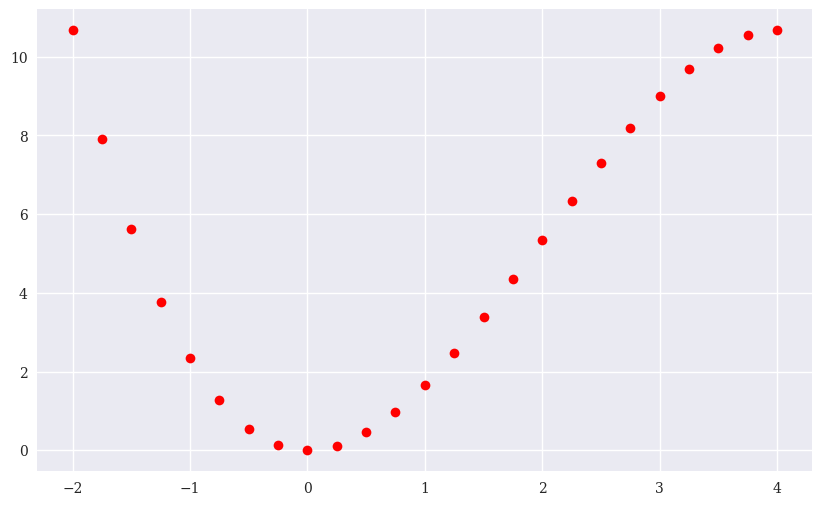

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro');

In [23]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

1.0541666666666667

In [24]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [25]:
y_ = alpha + beta * x

In [26]:
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

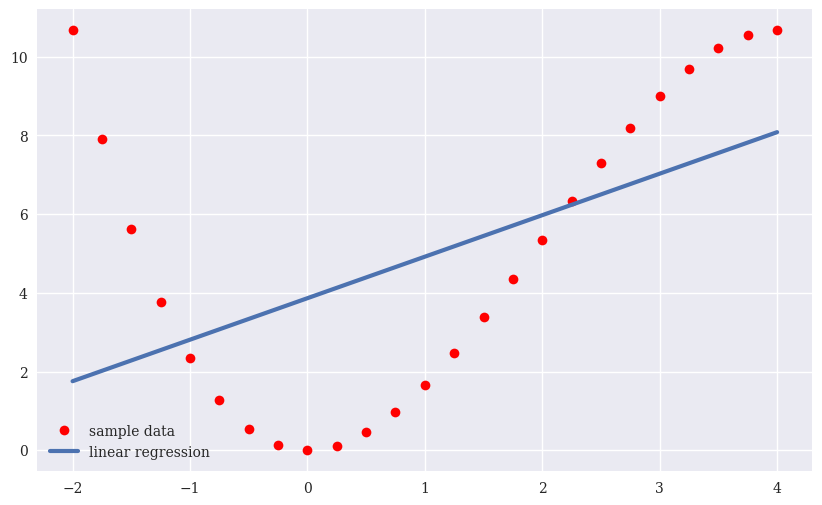

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend();

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


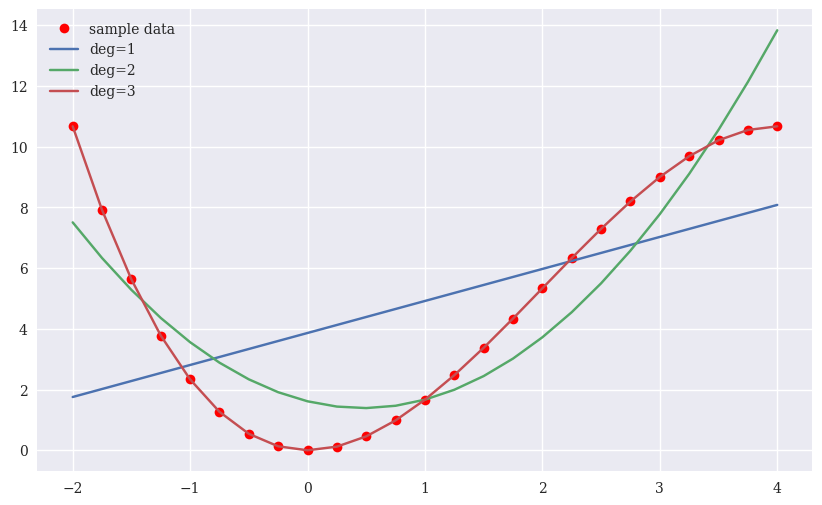

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

In [29]:
reg

array([-0.3333,  2.    ,  0.    , -0.    ])

#Neural Network — sklearn

In [30]:
from sklearn.neural_network import MLPRegressor

In [31]:
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000)

In [32]:
model.fit(x.reshape(-1, 1), y)

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

In [33]:
y_ = model.predict(x.reshape(-1, 1))

In [34]:
MSE = ((y - y_) ** 2).mean()
MSE

0.008318112824939305

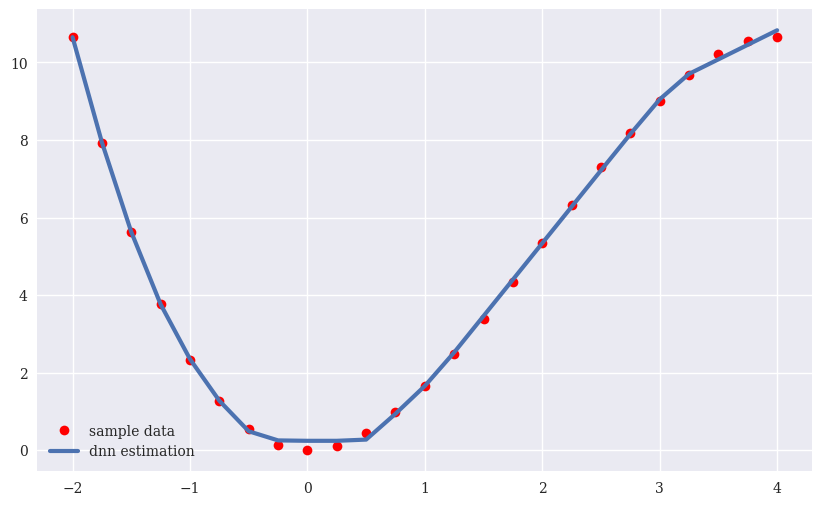

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend();


#Neural Network — Keras

In [36]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [37]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(100)

这段代码使用Keras库来构建和编译一个简单的神经网络模型。Keras是一个高层神经网络API，它可以运行在TensorFlow, CNTK, 或Theano之上。
总结来说，这段代码构建了一个简单的两层全连接神经网络（也叫多层感知机），其中第一层有256个神经元和ReLU激活函数，第二层是单神经元输出层，使用线性激活函数。用于回归任务的模型已被编译好，并准备进行训练。

In [38]:
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1)) #
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [39]:
((y - y_) ** 2).mean()

0.008318112824939305

1/1 [==============================] - 0s 193ms/step
round=1 | MSE=3.07606
1/1 [==============================] - 0s 65ms/step
round=2 | MSE=0.83696
1/1 [==============================] - 0s 50ms/step
round=3 | MSE=0.31324
1/1 [==============================] - 0s 70ms/step
round=4 | MSE=0.14398
1/1 [==============================] - 0s 67ms/step
round=5 | MSE=0.10158


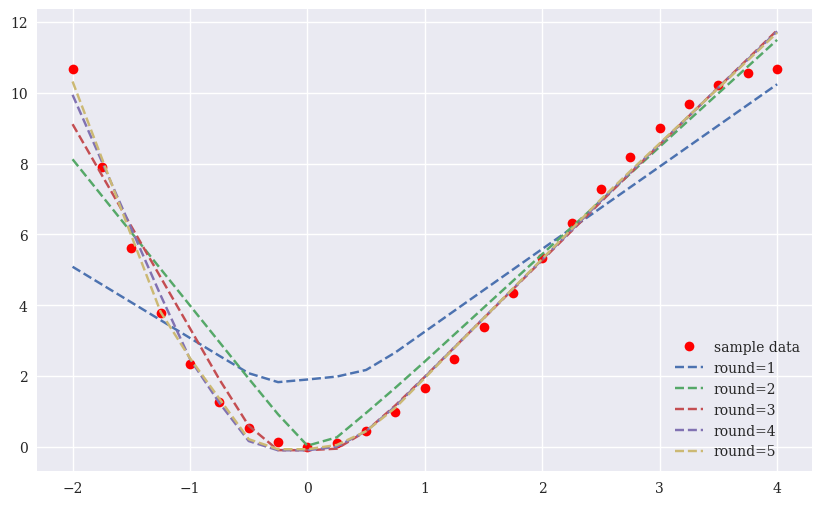

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

#Universal Approximation

生成了一组随机的样本点x和y；
对样本数据使用不同度数的多项式进行拟合；
计算每次多项式拟合的均方误差（MSE）并打印出来；
使用Matplotlib将原始数据和不同度数的多项式拟合曲线绘制到图形窗口中，并显示图例。
这个过程显示了如何评估多项式的拟合程度，以及不同度数的多项式如何影响拟合结果和拟合误差。

In [41]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


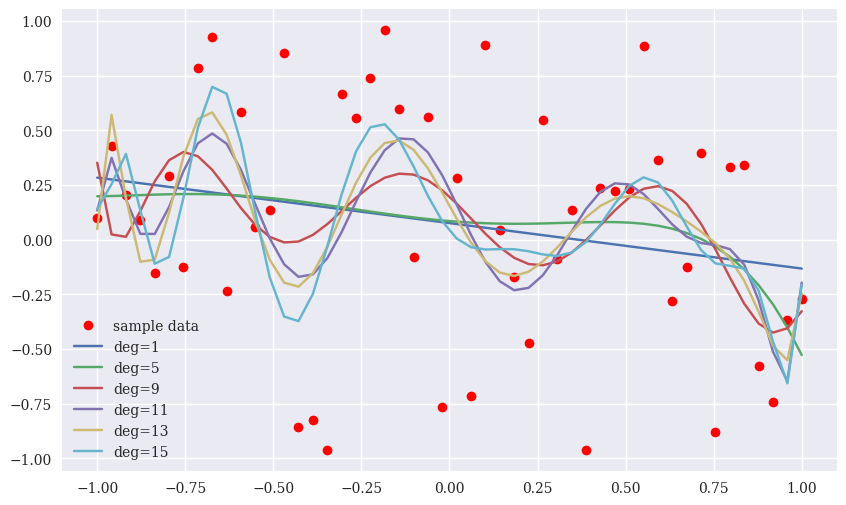

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

In [43]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 198145 (774.00 KB)
Trainable params: 198145 (774.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2/2 [==============================] - 0s 11ms/step
round=1 | MSE=0.17298
2/2 [==============================] - 0s 6ms/step
round=2 | MSE=0.15570
2/2 [==============================] - 0s 7ms/step
round=3 | MSE=0.10441
2/2 [==============================] - 0s 6ms/step
round=4 | MSE=0.08629
2/2 [==============================] - 0s 6ms/step
round=5 | MSE=0.04053
2/2 [==============================] - 0s 7ms/step
round=6 | MSE=0.02982
2/2 [==============================] - 0s 5ms/step
round=7 | MSE=0.00796
CPU times: user 38.8 s, sys: 1.46 s, total: 40.2 s
Wall time: 46.6 s


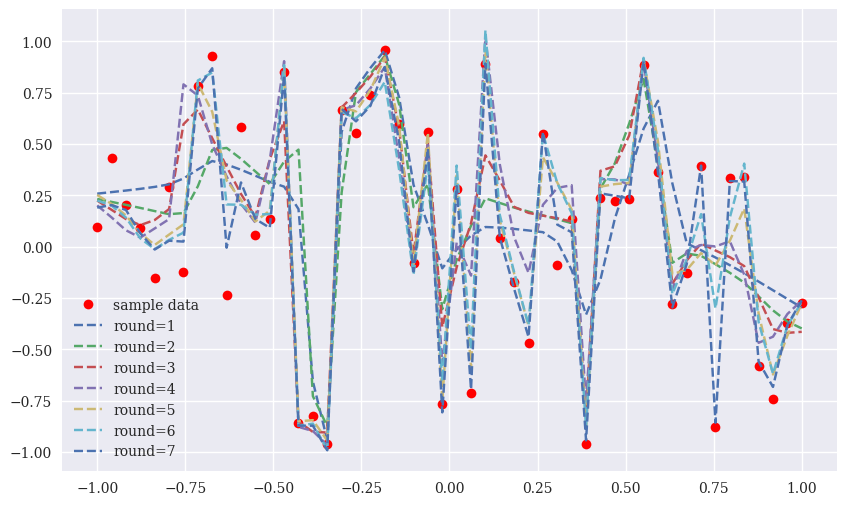

In [45]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

#Importance of Big Data

这段代码演示了如何使用Keras库创建和训练一个简单的神经网络，以执行二分类任务。以下是详细解释：

> f = 5：定义特征数量为5。

> n = 10：定义样本数量为10。

> np.random.seed(100)：设置NumPy的随机数生成器的种子值为100，以便每次运行代码时生成相同的随机数序列，保证结果的可重复性。

> x = np.random.randint(0, 2, (n, f))：使用NumPy的randint函数生成一个形状为(n, f)（即10行5列）的数组，其元素为0或1，代表10个样本的二进制特征。

> y = np.random.randint(0, 2, n)：生成一个长度为n的数组，其元素为0或1，代表10个样本的二分类目标变量。

> model = Sequential()：创建一个Sequential模型实例。

> model.add(Dense(256, activation='relu', input_dim=f))：向模型添加一个全连接层，有256个神经元，激活函数为ReLU，输入维度为f（特征数量）。

> model.add(Dense(1, activation='sigmoid'))：向模型添加一个全连接层，有1个神经元，激活函数为sigmoid，用于输出一个介于0和1之间的预测概率，用于二分类。

> model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])：编译模型，并设置损失函数为二元交叉熵，优化器为RMSprop，评估指标为准确率（acc）。

> hist = model.fit(x, y, epochs=50, verbose=False)：在x和y上训练模型50个周期（epochs），并将训练过程中的历史记录保存在变量hist中。verbose=False意味着在训练过程中不输出进度条信息。

> y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)：使用训练好的模型对输入x进行预测，然后将输出的概率通过阈值0.5转换为二进制标签（0或1），保存在y_中。

> y == y_：比较原始标签y和预测标签y_是否相同。

> res = pd.DataFrame(hist.history)：将训练历史（包含损失和准确率等信息）转换为一个Pandas数据框（DataFrame）。

> res.plot(figsize=(10, 6))：使用Pandas内置的绘图函数将训练过程中的损失和准确率绘制在一个图表中，设置图表大小为宽10英寸，高6英寸。



综上所述，这段代码首先生成了一组随机的二分类数据集，然后构建和训练了一个简单的神经网络模型来进行二分类，并记录了训练过程中的性能变化，最后可视化了损失和准确率的变化曲线。这个过程展示了神经网络在处理二分类问题中的一般工作流程。

In [46]:
f = 5
n = 10

In [47]:
np.random.seed(100)

In [48]:
x = np.random.randint(0, 2, (n, f))
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [49]:
y = np.random.randint(0, 2, n)
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [50]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [51]:
hist = model.fit(x, y, epochs=50, verbose=False)

In [52]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_

1/1 [==============================] - 0s 70ms/step


array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [53]:
y == y_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True])

In [54]:
res = pd.DataFrame(hist.history)

<Axes: >

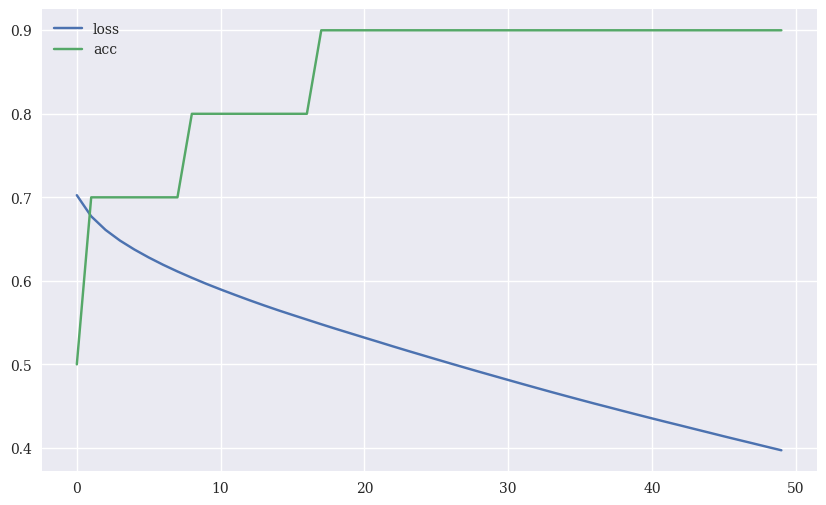

In [55]:
res.plot(figsize=(10, 6))

In [56]:
f = 10
n = 250

In [57]:
np.random.seed(100)

In [58]:
x = np.random.randint(0, 2, (n, f))
x[:4]

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 0]])

In [59]:
y = np.random.randint(0, 2, n)
y[:4]

array([0, 1, 0, 0])

In [60]:
2 ** f

1024

In [61]:
fcols = [f'f{_}' for _ in range(f)]
fcols

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [62]:
data = pd.DataFrame(x, columns=fcols)
data['l'] = y

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f0      250 non-null    int64
 1   f1      250 non-null    int64
 2   f2      250 non-null    int64
 3   f3      250 non-null    int64
 4   f4      250 non-null    int64
 5   f5      250 non-null    int64
 6   f6      250 non-null    int64
 7   f7      250 non-null    int64
 8   f8      250 non-null    int64
 9   f9      250 non-null    int64
 10  l       250 non-null    int64
dtypes: int64(11)
memory usage: 21.6 KB


In [64]:
grouped = data.groupby(list(data.columns))

In [65]:
freq = grouped['l'].size().unstack(fill_value=0)

In [66]:
freq['sum'] = freq[0] + freq[1]

In [67]:
freq.head(10)

l                              0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9           
0  0  0  0  0  0  0  1  1  1   0  1    1
                  1  0  1  0   1  1    2
                           1   0  1    1
               1  0  0  0  0   1  0    1
                           1   0  1    1
                     1  1  1   0  1    1
                  1  0  0  0   0  1    1
                        1  0   0  1    1
            1  0  0  0  1  1   1  0    1
                  1  1  0  0   1  0    1

In [68]:
freq['sum'].describe().astype(int)

count    227
mean       1
std        0
min        1
25%        1
50%        1
75%        1
max        2
Name: sum, dtype: int64

In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [70]:
model = MLPClassifier(hidden_layer_sizes=[128, 128, 128],
                      max_iter=1000, random_state=100)

In [71]:
model.fit(data[fcols], data['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [72]:
accuracy_score(data['l'], model.predict(data[fcols]))

0.952

In [73]:
split = int(len(data) * 0.7)

In [74]:
train = data[:split]
test = data[split:]

In [75]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [76]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9714285714285714

In [77]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.38666666666666666

这段代码执行了以下步骤：

1. 设置参数和种子：

  f = 10：定义10个特征。

  n = 250：定义250个样本。

  np.random.seed(100)：为随机数生成器设置种子，以确保结果可重现。

2. 生成数据集：

  x = np.random.randint(0, 2, (n, f))：生成一个(n, f)形状的数组，即250行10列的二进制随机数据。

  y = np.random.randint(0, 2, n)：生成一个长度为n的二进制随机向量作为标签。

3. 创建DataFrame：

  fcols = [f'f{_}' for _ in range(f)]：为特征创建一个列表，包含'f0'到'f9'的列名。

  data = pd.DataFrame(x, columns=fcols)：创建一个Pandas DataFrame，其中x是数据，fcols是列名。

  data['l'] = y：在DataFrame中添加列'l'，它包含标签y。

4. 输出DataFrame信息：

  data.info()：打印DataFrame的简要信息。

5. 分组和统计：

  grouped = data.groupby(list(data.columns))：按所有列对DataFrame进行分组，即按每个特征值组合和标签进行分组。

  freq = grouped['l'].size().unstack(fill_value=0)：统计每组的大小，并以二分类标签'l'的不同值进行展开，缺失值填充为0。

  freq['sum'] = freq[0] + freq[1]：计算每个特征组合的总频率（即标签0和1的总和）。

  freq['sum'].describe().astype(int)：获取总频率的描述性统计信息，并转换为整数类型。

6. 创建和训练神经网络模型：

  引入MLPClassifier：从sklearn.neural_network导入多层感知器分类器。

  引入accuracy_score：从sklearn.metrics导入准确度评分函数。

  创建MLPClassifier实例：设置隐藏层大小为三层，每层128个神经元，最大迭代次数为1000，随机状态设为100。

  model.fit(data[fcols], data['l'])：使用所有数据训练模型。

  accuracy_score(data['l'], model.predict(data[fcols]))：计算整个数据集上的准确度。

7. 创建训练集和测试集：

  split = int(len(data) * 0.7)：计算分割点，70%的数据用于训练。

  train = data[:split]：划分训练集。

  test = data[split:]：划分测试集。

8. 训练和测试模型：

  再次使用model.fit(train[fcols], train['l'])训练模型，但这次只使用训练集。

  使用accuracy_score分别计算训练集和测试集上的准确度。

总结来说，这段代码首先生成了一个包含二进制特征和标签的数据集，并对数据进行了初步的描述性统计分析。然后，构建了一个多层感知器神经网络模型，对全数据集进行了训练和评估，接着将数据集分割为训练集和测试集，重新训练了模型，并分别评估了训练集和测试集的准确度以检验模型的性能。这样可以了解模型在未见过的数据上的表现。

In [78]:
factor = 50

In [79]:
big = pd.DataFrame(np.random.randint(0, 2, (factor * n, f)),
                   columns=fcols)

In [80]:
big['l'] = np.random.randint(0, 2, factor * n)

In [81]:
train = big[:split]
test = big[split:]

In [82]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [83]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9657142857142857

In [84]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.5043407707910751

In [85]:
grouped = big.groupby(list(data.columns))

In [86]:
freq = grouped['l'].size().unstack(fill_value=0)

In [87]:
freq['sum'] = freq[0] + freq[1]

In [88]:
freq.head(6)

l                               0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9            
0  0  0  0  0  0  0  0  0  0   10  9   19
                           1    5  4    9
                        1  0    2  5    7
                           1    6  6   12
                     1  0  0    9  8   17
                           1    7  4   11

In [89]:
freq['sum'].describe().astype(int)

count    1024
mean       12
std         3
min         2
25%        10
50%        12
75%        15
max        26
Name: sum, dtype: int64

In [90]:
8 ** 25

37778931862957161709568